In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [2]:
sns.set()
data = pd.read_csv("data_uniform.csv", dtype={'time':np.float64})

data['error'] = [float(x[1:-1]) for x in data['fbest']]
data['time_minutes'] = data['time'] / 60

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "sol", "time", "Unnamed: 0", "nPop"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)
data.head()

,f1,grad,error,time_minutes,1,2,3,4,5,6
0,50,50,205.892884,19.754099,43.386577,322.456556,404.115963,434.224418,965.949754,1580.313458
1,50,100,84.271231,21.179402,47.466112,319.547932,441.664889,462.457984,928.301000,1498.429547
2,50,200,17.596953,23.392409,51.124571,324.017068,468.314549,621.251693,1002.856753,1546.123799
3,50,300,10.826037,19.312589,60.602997,354.470074,554.492030,718.861494,1275.194158,1527.778777
4,50,400,15.543091,22.109801,73.452394,454.175590,665.054596,994.695348,1674.238138,2086.371370


In [3]:
data.describe()

,f1,grad,error,time_minutes,1,2,3,4,5,6
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,716.666667,350.000000,33.855859,20.338831,144.868608,742.864059,1176.538669,1336.048635,1936.048640,2820.138552
std,642.826420,254.158955,32.093652,1.575795,60.970746,296.251184,482.656501,525.037931,706.862937,1145.708142
min,50.000000,50.000000,4.832880,16.379410,43.386577,312.170483,404.115963,434.224418,928.301000,1397.477920
25%,200.000000,100.000000,16.782034,19.477044,81.183490,471.620068,702.221143,875.537830,1291.686526,1853.454727
50%,500.000000,300.000000,28.426249,20.233253,166.375008,723.913420,1257.002073,1406.339584,1935.148061,2427.723856
75%,1000.000000,600.000000,37.649188,21.193705,199.723150,1032.523919,1647.390498,1824.958538,2607.947968,3683.264148
max,2000.000000,800.000000,205.892884,23.666224,217.374658,1159.424808,1814.456397,1969.423935,3064.992407,5549.452386


### Grouping by first frequency

In [4]:
errors = data.drop(['time_minutes'], axis=1)
errors.drop([x for x in errors.columns if type(x)==int], axis=1, inplace=True)

errors.head()

,f1,grad,error
0,50,50,205.892884
1,50,100,84.271231
2,50,200,17.596953
3,50,300,10.826037
4,50,400,15.543091


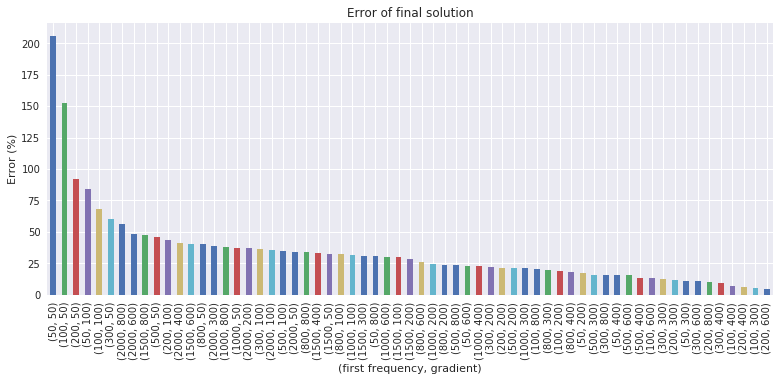

In [5]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (13,5)

ax = errors.sort_values(by="error", ascending=False).plot(kind="bar", x=['f1', 'grad'], y='error', legend=False)
plt.suptitle("")
plt.title("Error of final solution")
plt.xlabel("(first frequency, gradient)")
plt.ylabel("Error (%)")
plt.show()

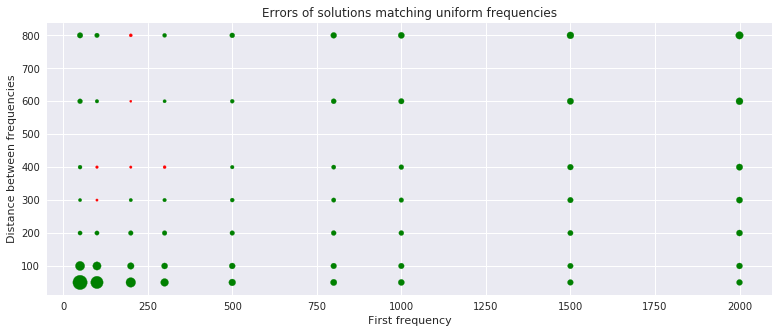

In [6]:
ax = errors.plot.scatter(x='f1', y='grad', s=errors['error'], c=['g' if x>10 else 'r' for x in errors['error']], sharex=False)
plt.xlabel("First frequency")
plt.ylabel("Distance between frequencies")
plt.title("Errors of solutions matching uniform frequencies")
plt.show()